In [1]:
import itertools
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def old_school_inv(m):
    nrow, ncol = m.shape[0], m.shape[1]
    # Get minor matrix.
    minor = np.zeros_like(m)
    for r, c in itertools.product(range(nrow), range(ncol)):
        rmask = [True] * nrow
        cmask = [True] * ncol
        rmask[r] = False
        cmask[c] = False
        minor[r, c] = np.linalg.det(m[rmask, :][:, cmask])
        
    # Get cofactor matrix
    cofactor = np.zeros_like(m)
    for r, c in itertools.product(range(nrow), range(ncol)):
        cofactor[r, c] = (-1)**(r + c) * minor[r, c]
    
    return cofactor.T / np.linalg.det(m)        

In [3]:
def new_school_inv(m):
    q, r = np.linalg.qr(m)
    return np.linalg.inv(r) @ q.T

In [4]:
M = np.random.randn(5, 5)
old_inv = old_school_inv(M)
new_inv = new_school_inv(M)
old_err = np.sqrt(np.sum((np.eye(5, 5) - old_inv @ M)**2))
new_err = np.sqrt(np.sum((np.eye(5, 5) - new_inv @ M)**2))

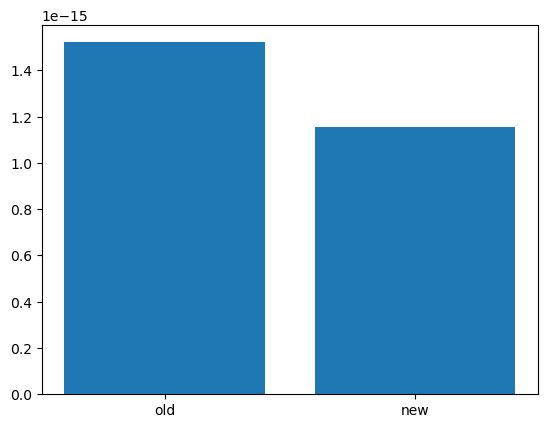

In [5]:
fig, ax = plt.subplots()
ax.bar([0, 1], [old_err, new_err])
ax.set_xticks([0, 1], labels=["old", "new"])
plt.show()